In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

In [3]:
data = pd.read_csv('train_data.csv')
print (data.shape)
data.head()

(17290, 20)


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20140915T000000,392000.0,4,3.75,2220,3797,1.5,0,0,4,6,1330,890,1917,0,98108,47.5574,-122.315,1490,4340
1,20140730T000000,300000.0,3,2.25,1960,1585,2.0,0,0,3,7,1750,210,2003,0,98118,47.5414,-122.288,1760,1958
2,20150325T000000,440000.0,2,1.50,1330,15873,1.0,0,0,3,7,900,430,1984,0,98074,47.6359,-122.033,1610,12043
3,20150219T000000,800500.0,4,2.50,1780,11130,1.0,0,0,5,8,1780,0,1962,0,98005,47.5931,-122.178,2610,11130
4,20140701T000000,485000.0,4,1.75,1430,4096,2.0,0,0,3,7,1430,0,1900,0,98122,47.6040,-122.306,1640,3377


In [4]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,5.385511e+05,3.364025,2.111495,2073.323135,1.499664e+04,1.494361,0.007345,0.231405,3.406883,7.651822,1784.080335,289.242799,1971.044014,84.498323,98077.814286,47.560276,-122.214056,1982.792539,12661.981724
std,3.624858e+05,0.932223,0.768665,915.867612,4.060774e+04,0.540440,0.085392,0.761939,0.651066,1.173284,825.505311,441.569195,29.372193,401.905019,53.386571,0.138424,0.140517,683.163995,26526.840702
min,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.162200,-122.519000,460.000000,659.000000
25%,3.230000e+05,3.000000,1.500000,1420.000000,5.030000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1952.000000,0.000000,98033.000000,47.472600,-122.328000,1480.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.583500e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572150,-122.229000,1840.000000,7600.000000
75%,6.410000e+05,4.000000,2.500000,2540.000000,1.063250e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2200.750000,560.000000,1997.000000,0.000000,98117.000000,47.678000,-122.124000,2360.000000,10078.750000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


<function seaborn.utils.despine>

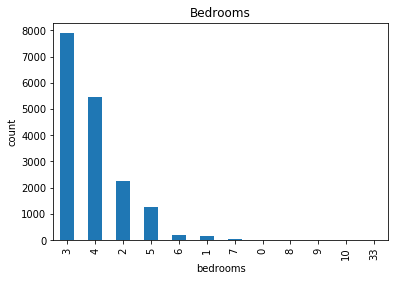

In [17]:
data['bedrooms'].value_counts().plot(kind='bar')
plt.title('Bedrooms')
plt.xlabel('bedrooms')
plt.ylabel('count')
sns.despine

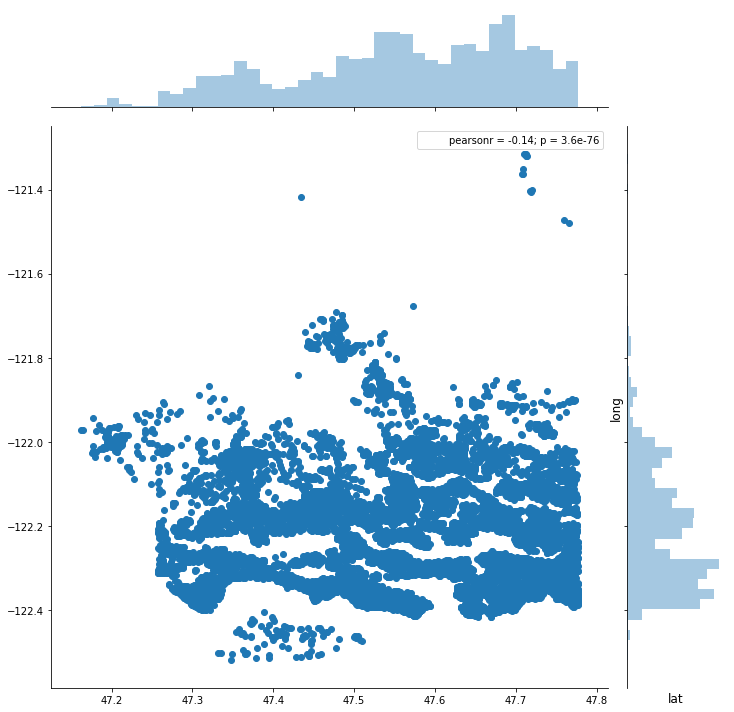

<function seaborn.utils.despine>

In [18]:
plt.figure(figsize=(10,10))
sns.jointplot(x=data.lat.values, y=data.long.values, size=10)
plt.ylabel('long', fontsize=12)
plt.xlabel('lat', fontsize=12)
plt.show()
sns.despine

Text(0.5,1,'Price(sqft)')

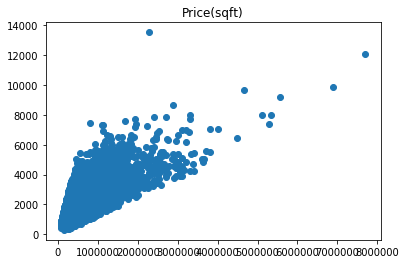

In [19]:
plt.scatter(data.price, data.sqft_living)
plt.title('Price(sqft)')

<function seaborn.utils.despine>

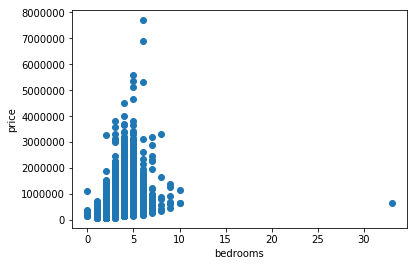

In [21]:
plt.scatter(data.bedrooms,data.price)
plt.xlabel('bedrooms')
plt.ylabel('price')
sns.despine

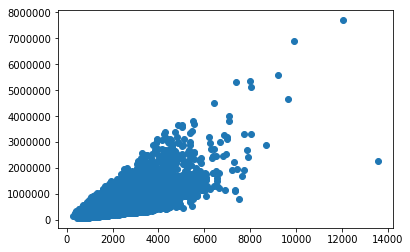

In [23]:
plt.scatter(data['bedrooms']+data['sqft_living'], data.price)

In [ ]:
from sklearn.linear_model import GradientBoostingClassifier
grad = GradientBoostingClassifier()
labels = data['price']
conv_dates = [1 if values == 2014 else 0 for values in data.date]
data.date = conv_dates
train1 = data.drop('price',axis = 1)
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train1, labels, test_size=0.10, random_state=2)
grad.fit(x_train, y_train)
grad.score(x_test,y_test)

In [34]:
from sklearn import ensemble 
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2, learning_rate = 0.1, loss = 'ls')
clf.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [37]:
clf.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [38]:
clf.score(x_test,y_test)

0.88589525017470372